In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#viewing top 5 records of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='gender', ylabel='count'>

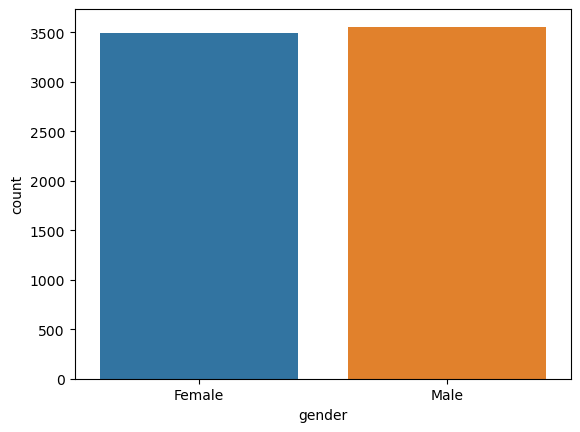

In [5]:
#making countplot to know the number of male and female visually
sns.countplot(data=df, x='gender')

We can see the number of male customers is more as compared to female customers.

<Axes: xlabel='SeniorCitizen', ylabel='count'>

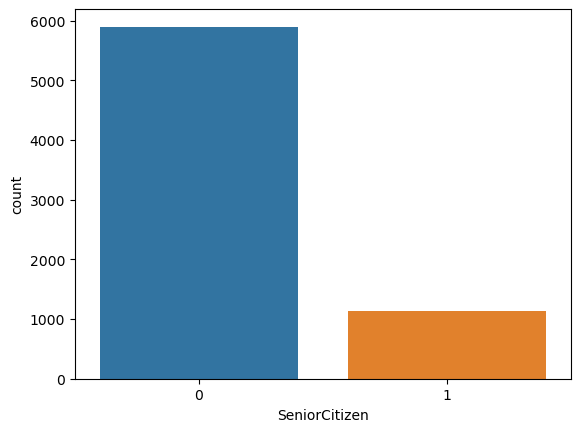

In [6]:
#counting the number of senior citizens
sns.countplot(data=df, x='SeniorCitizen')

We can see that the number of senior citizens is about 1000 only out of 7043 customers.

Since TotalCharges is a numerical column but it is defines as an object so we have to change the datatype from obj to int64

In [7]:
# Identify non-numeric values in 'TotalCharges'
non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(non_numeric)

# Option 1: Replace non-numeric values with 0 or a default value before conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0).astype('int')

# Option 2: Drop rows with non-numeric 'TotalCharges' values
df = df.dropna(subset=['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].astype('int')


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [8]:
#using groupby to understand the distributions
res=df.groupby(['gender']).sum(numeric_only=True)

In [9]:
res

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender,,,,
Female,568,112469,227432.4,7950710
Male,574,115521,228684.2,8102154


We can see out of 1000 senior citizens 568 are female and 574 are male and the monthycharges,tenure and total charges are high for Male senior citizens.

We are going to encode the dependent and independent variables.

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#encoding our independent variables
data_encoded=pd.get_dummies(df,columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],drop_first=True,dtype=int)

In [13]:
data_encoded

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29,No,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889,No,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108,Yes,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840,No,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151,Yes,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990,No,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362,No,0,1,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346,No,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306,Yes,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [14]:
data_encoded.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [15]:
#renaming our independent variables after using dummy variable
data_encoded.rename(columns={'gender_Male':'Gender',
                            'Partner_Yes':'Partner',
                             'Dependents_Yes':'Dependents',
                            'PhoneService_Yes':'PhoneService',
                             'MultipleLines_No phone service':'No phone service',
                               'MultipleLines_Yes':'MultipleLines',
                             'InternetService_Fiber optic':'Fiber optic',
                               'InternetService_No':'InternetService',
                             'OnlineSecurity_No internet service':'Internet service for online Security',
                               'OnlineSecurity_Yes':'Online Security', 
                             'OnlineBackup_No internet service':'Internet service for Online Backup',
       'OnlineBackup_Yes':'Online backup',
                             'DeviceProtection_No internet service':'Internet service for Device protection',
       'DeviceProtection_Yes':'Device protection',
                             'TechSupport_No internet service':'Internet service for Tech Support',
       'TechSupport_Yes':'Tech Support', 
                             'StreamingTV_No internet service':'Internet service for StreamingTV', 
                             'StreamingTV_Yes':'Streaming TV',
       'StreamingMovies_No internet service':'Internet service for Streaming Movies', 
                             'StreamingMovies_Yes':'Streaming Movies',
       'Contract_One year':'One year contract', 'Contract_Two year':'Two year contract', 
                             'PaperlessBilling_Yes':'PaperlessBilling',
       'PaymentMethod_Credit card (automatic)':'AutomaticPayment by CC',
       'PaymentMethod_Electronic check':'AutomaticPayment by EC', 
                             'PaymentMethod_Mailed check':'AutomaticPayment by MC'},inplace=True)

In [16]:
data_encoded

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Gender,Partner,Dependents,PhoneService,...,Internet service for StreamingTV,Streaming TV,Internet service for Streaming Movies,Streaming Movies,One year contract,Two year contract,PaperlessBilling,AutomaticPayment by CC,AutomaticPayment by EC,AutomaticPayment by MC
0,7590-VHVEG,0,1,29.85,29,No,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889,No,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108,Yes,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840,No,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151,Yes,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990,No,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362,No,0,1,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346,No,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306,Yes,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


We can see there are no duplicate values.

Now encoding our target variable.

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_encoded['Churn']=le.fit_transform(data_encoded['Churn'])

In [18]:
data_encoded

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Gender,Partner,Dependents,PhoneService,...,Internet service for StreamingTV,Streaming TV,Internet service for Streaming Movies,Streaming Movies,One year contract,Two year contract,PaperlessBilling,AutomaticPayment by CC,AutomaticPayment by EC,AutomaticPayment by MC
0,7590-VHVEG,0,1,29.85,29,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362,0,0,1,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [19]:
#dropping unnecessary variables
data_encoded=data_encoded.drop(['customerID'],axis=1)

In [20]:
data_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Gender,Partner,Dependents,PhoneService,No phone service,...,Internet service for StreamingTV,Streaming TV,Internet service for Streaming Movies,Streaming Movies,One year contract,Two year contract,PaperlessBilling,AutomaticPayment by CC,AutomaticPayment by EC,AutomaticPayment by MC
0,0,1,29.85,29,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [21]:
data_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Gender', 'Partner', 'Dependents', 'PhoneService', 'No phone service',
       'MultipleLines', 'Fiber optic', 'InternetService',
       'Internet service for online Security', 'Online Security',
       'Internet service for Online Backup', 'Online backup',
       'Internet service for Device protection', 'Device protection',
       'Internet service for Tech Support', 'Tech Support',
       'Internet service for StreamingTV', 'Streaming TV',
       'Internet service for Streaming Movies', 'Streaming Movies',
       'One year contract', 'Two year contract', 'PaperlessBilling',
       'AutomaticPayment by CC', 'AutomaticPayment by EC',
       'AutomaticPayment by MC'],
      dtype='object')

Splitting into X and Y variable

In [22]:
X=data_encoded.loc[:,['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Gender', 'Partner', 'Dependents', 'PhoneService', 'No phone service',
       'MultipleLines', 'Fiber optic', 'InternetService',
       'Internet service for online Security', 'Online Security',
       'Internet service for Online Backup', 'Online backup',
       'Internet service for Device protection', 'Device protection',
       'Internet service for Tech Support', 'Tech Support',
       'Internet service for StreamingTV', 'Streaming TV',
       'Internet service for Streaming Movies', 'Streaming Movies',
       'One year contract', 'Two year contract', 'PaperlessBilling',
       'AutomaticPayment by CC', 'AutomaticPayment by EC',
       'AutomaticPayment by MC']]

In [23]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PhoneService,No phone service,MultipleLines,...,Internet service for StreamingTV,Streaming TV,Internet service for Streaming Movies,Streaming Movies,One year contract,Two year contract,PaperlessBilling,AutomaticPayment by CC,AutomaticPayment by EC,AutomaticPayment by MC
0,0,1,29.85,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [24]:
Y=data_encoded['Churn']

In [25]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

Now we will split the dataset into train and testing dataset

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

We will be using 4 ML techniques namely Logistic Regression, Decision Tree Classifier, KNN Classifier, SVM classifier. Based on the accuracy of the m,odel we will select the model that's the best.

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR=LogisticRegression()

In [29]:
LR.fit(X_train,y_train)

C:\Users\PC098\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
LR.score(X_train,y_train)

0.8054766734279919

In [31]:
y_predict=LR.predict(X_test)

In [32]:
data_encoded['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.69      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113



Since there is misbalance in the classes of our target variable we will consider the f1 score which is 80% which means our model is performing good enough to predict the classes.

## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy', min_samples_split=18,
 min_samples_leaf= 6,
 max_leaf_nodes= 21,
 max_depth= 9)

In [35]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=21,
                       min_samples_leaf=6, min_samples_split=18)

In [36]:
dt_predict=DT.predict(X_test)

In [37]:
DT.score(X_train,y_train)

0.8008113590263691

In [38]:
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1539
           1       0.62      0.62      0.62       574

    accuracy                           0.79      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.79      0.79      0.79      2113



We can see the decisiontreeclassifier is giving 79% F1score.

## KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=3)

In [40]:
KN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
X_test1 = np.array(X_test).astype(np.float64)

In [42]:
KNpred=KN.predict(X_test1)

C:\Users\PC098\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [43]:
print(classification_report(y_test,KNpred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1539
           1       0.57      0.47      0.52       574

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113



The f1 score for KNN classifier i.e 75%.

## Support Vector Classifier

In [44]:
from sklearn.svm import SVC

In [45]:
sv=SVC()

In [46]:
sv.fit(X_train,y_train)

SVC()

In [47]:
sv_pred=sv.predict(X_test)

In [48]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1539
           1       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



C:\Users\PC098\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC098\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC098\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The f1 score for SVC is 61%.

So out of 4 ML models Logistic regression is providing us a decent accuracy of 80% as compared to other ML models. Hence Logistic Regression model will be selected for future prediction.